In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [2]:
baseball = pd.read_csv("mlb-historic-ratios.csv")
baseball

,wins,attend
0,0.491,1712417
1,0.617,1797438
2,0.395,1206776
3,0.438,1200365
4,0.599,2288714
...,...,...
861,0.534,2416237
862,0.564,1510300
863,0.558,3178273
864,0.457,1374141


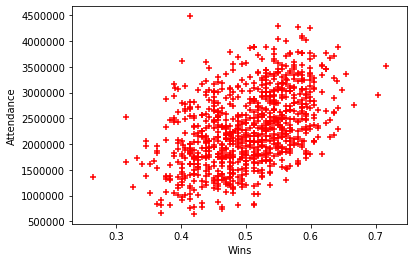

In [3]:
# Importing the dataset
%matplotlib inline
plt.xlabel('Wins')
plt.ylabel('Attendance')
plt.scatter(baseball.wins,baseball.attend, color='red', marker='+')


In [4]:
new_wins = baseball.drop('attend',axis='columns')
new_wins

,wins
0,0.491
1,0.617
2,0.395
3,0.438
4,0.599
...,...
861,0.534
862,0.564
863,0.558
864,0.457


In [5]:
new_attend = baseball.attend
new_attend

0      1712417
1      1797438
2      1206776
3      1200365
4      2288714
        ...   
861    2416237
862    1510300
863    3178273
864    1374141
865    3080980
Name: attend, Length: 866, dtype: int64

In [6]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_wins,new_attend)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
reg.predict([[80]])

array([3.96436403e+08])

In [8]:
reg.coef_

array([4957862.85932518])

In [9]:
reg.intercept_

-192626.0716733043

In [10]:
reg.predict([[2500000]])

array([1.2394657e+13])

In [11]:
wins_list = pd.read_csv("predict-ratios-groups.csv")
wins_list.head(3)

,wins
0,0.30
1,0.35
2,0.40


In [12]:
p = reg.predict(wins_list)
p

array([1294732.78612425, 1542625.92909051, 1790519.07205677,
       2038412.21502302, 2286305.35798928, 2534198.50095554,
       2782091.6439218 , 3029984.78688806, 3277877.92985432,
       3525771.07282058, 3773664.21578684, 4021557.35875309,
       4269450.50171935])

In [13]:
wins_list['attend']=p
wins_list

,wins,attend
0,0.30,1.294733e+06
1,0.35,1.542626e+06
2,0.40,1.790519e+06
3,0.45,2.038412e+06
4,0.50,2.286305e+06
5,0.55,2.534199e+06
6,0.60,2.782092e+06
7,0.65,3.029985e+06
8,0.70,3.277878e+06
9,0.75,3.525771e+06


In [15]:
X = baseball["wins"].values.reshape(-1, 1)
y = baseball["attend"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (866, 1) (866, 1)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X_test)

mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 412667738264.49255
R-squared (R2 ): 0.21626835788291754


In [21]:
model.score(X_test, y_test)

0.21626835788291754

In [14]:
wins_list.to_csv("prediction-mlb-ratios.csv")